https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

In [ ]:
# ! pip install lifelines

In [10]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi = load_rossi()

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest', show_progress=True)

cph.print_summary(style="ascii")  # access the individual results using cph.summary

Iteration 1: norm_delta = 5.09e-01, step_size = 0.9500, log_lik = -675.38063, newton_decrement = 1.68e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.39e-01, step_size = 0.9500, log_lik = -659.79004, newton_decrement = 9.92e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.80e-02, step_size = 0.9500, log_lik = -658.76197, newton_decrement = 1.42e-02, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.83e-04, step_size = 1.0000, log_lik = -658.74766, newton_decrement = 1.32e-06, seconds_since_start = 0.0
Iteration 5: norm_delta = 1.97e-08, step_size = 1.0000, log_lik = -658.74766, newton_decrement = 1.34e-14, seconds_since_start = 0.0
Convergence success after 5 iterations.
<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -6

### 1. Overall model information
- **`<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right - censored observations>`**
    - This indicates that the Cox Proportional - Hazard model was fitted using 432 observations in total. Out of these, 318 observations were right - censored. Right - censoring means that for these observations, the event of interest (in this case, "arrest") did not occur within the observation period.
- **`duration col = 'week'`**
    - The variable representing the time duration in the dataset is the "week" column. In the Cox model formula $h(t|x) = h_0(t)\exp(\beta^Tx)$, $t$ in this context is represented by the "week" variable.
- **`event col = 'arrest'`**
    - The variable indicating whether the event (re - arrest in this case) occurred is the "arrest" column. A value of 1 in this column means the event occurred, and 0 means it was censored.
- **`number of observations = 432`**
    - Total number of data points used in fitting the model.
- **`number of events observed = 114`**
    - Out of the 432 observations, 114 had the event (re - arrest) occur.
- **`partial log - likelihood = - 658.75`**
    - The partial log - likelihood value. In the Cox model, the partial likelihood function is used for estimation. Mathematically, for a set of $n$ observations $(t_i, \delta_i, x_i)$ where $t_i$ is the time, $\delta_i$ is the event indicator ($1$ if event occurred, $0$ if censored), and $x_i$ is the covariate vector, the partial likelihood is $L(\beta)=\prod_{i = 1}^{n}\left(\frac{\exp(\beta^Tx_i)}{\sum_{j\in R(t_i)}\exp(\beta^Tx_j)}\right)^{\delta_i}$, and the partial log - likelihood is $\ln L(\beta)$. A higher (less negative) partial log - likelihood indicates a better fit of the model to the data.
- **`time fit was run = 2019 - 10 - 05 14:24:44 UTC`**
    - Timestamp when the model was fitted.

### 2. Coefficient estimates
- **`coef`**:
    - These are the estimated regression coefficients $\beta$ in the Cox model formula $h(t|x) = h_0(t)\exp(\beta^Tx)$. For example, for the "fin" variable, the coefficient is $-0.38$. A negative coefficient implies that an increase in the "fin" variable is associated with a decrease in the hazard rate.
- **`exp(coef)`**:
    - This is the exponentiation of the coefficient, which gives the hazard ratio (HR) for each covariate. For "fin", $\exp(- 0.38)=0.68$. If $HR < 1$, as in the case of "fin", it means that an increase in the "fin" variable is associated with a lower risk of the event (re - arrest). For "prio", $\exp(0.09) = 1.10$, indicating that an increase in the number of prior arrests (prio) is associated with a 10% increase in the hazard rate.
- **`se(coef)`**:
    - Standard error of the coefficient estimates. It measures the uncertainty around the estimated coefficient. For example, the standard error for the "fin" coefficient is $0.19$.
- **`coef lower 95%` and `coef upper 95%`**:
    - These are the lower and upper bounds of the 95% confidence interval for the coefficient. If the 95% confidence interval for a coefficient does not contain 0, it suggests that the covariate is statistically significant at the 5% level. For "age", the 95% confidence interval $(-0.10, - 0.01)$ does not contain 0, indicating that "age" is a significant covariate. 4. 95% Confidence Interval of the Coefficient (Coefficient Lower/Upper 95%).

    For each coefficient $\hat{\beta}$, the calculation of its 95% confidence interval is based on the standard error and the properties of the normal distribution. The calculation formula is $\hat{\beta} \pm z_{0.025} \times se(\hat{\beta})$, where $z_{0.025}$ is the two-sided quantile of the standard normal distribution, corresponding to a 95% confidence level, which is approximately 1.96. 


- **`exp(coef) lower 95%` and `exp(coef) upper 95%`**:
    - 95% confidence intervals for the hazard ratio. For "race", the 95% confidence interval for the hazard ratio is $(0.75, 2.50)$, which means that we are 95% confident that the true hazard ratio for the "race" variable lies within this range.

### 3. Hypothesis testing statistics
- **`z`**:
    - The z - score for each coefficient, calculated as $z=\frac{\hat{\beta}}{se(\hat{\beta})}$, where $\hat{\beta}$ is the estimated coefficient and $se(\hat{\beta})$ is its standard error. It is used to test the null hypothesis that the coefficient is equal to 0. For "prio", $z = 3.19$, which is a relatively large value, indicating strong evidence against the null hypothesis.
- **`p`**:
    - The p - value associated with the z - score. It represents the probability of observing the data (or more extreme data) if the null hypothesis is true. A small p - value (e.g., $p<0.05$) indicates that the covariate is statistically significant. For "age", $p = 0.01$, suggesting that "age" is a significant predictor of the event.
- **`-log2(p)`**:
    - This is just another way of representing the significance of the result. Larger values of $-\log_2(p)$ indicate more significant results.

### 4. Model fit and performance metrics
- **`Concordance = 0.64`**:
    - The concordance index (also known as c - index) measures the ability of the model to rank the risk of events correctly. A value of 0.5 means the model's predictions are no better than random, and a value of 1 means perfect discrimination. Here, a concordance index of 0.64 indicates that the model has some discriminatory power, but there is still room for improvement.
- **`Partial AIC = 1331.50`**:
    - The Partial Akaike Information Criterion (AIC). For the Cox model, it is based on the partial log - likelihood. AIC is used for model selection, and a lower AIC value indicates a better - fitting model. It balances the goodness - of - fit of the model (captured by the log - likelihood) with the complexity of the model (number of parameters).
- **`log - likelihood ratio test = 33.27 on 7 df`**:
    - The log - likelihood ratio test compares the fit of the current model with a null model (usually a model with no covariates). The test statistic is calculated as $G = 2(\ln L_{full}-\ln L_{null})$, where $\ln L_{full}$ is the log - likelihood of the full model (the model with covariates) and $\ln L_{null}$ is the log - likelihood of the null model. Here, the test is based on 7 degrees of freedom (df), which is related to the number of covariates in the model. A large test statistic value suggests that the full model fits the data significantly better than the null model.
- **`-log2(p) of ll - ratio test = 15.37`**:
    - Similar to the individual coefficient p - values, this represents the significance of the log - likelihood ratio test result. A large value indicates strong evidence against the null hypothesis that the covariates do not contribute to the model. 

<Axes: xlabel='log(HR) (95% CI)'>

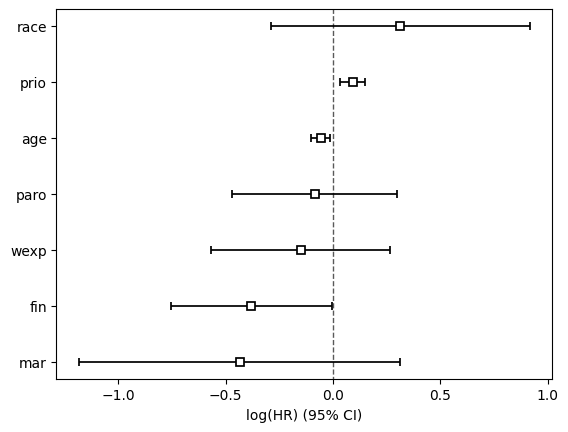

In [ ]:
cph.plot()

In survival analysis:
- **Meaning**: log(HR) stands for the natural logarithm of the Hazard Ratio (HR). The Hazard Ratio is used to compare the hazard functions of two groups (such as an exposed group and a non - exposed group), reflecting the multiple of the risk of event occurrence in one group relative to another. Taking the logarithm makes its distribution more approximately normal, which is convenient for statistical analysis and model fitting, making operations such as parameter estimation and hypothesis testing more reasonable.
 - **Explanation example**: If log(HR) = 0, the corresponding HR = 1, indicating that the risks of the two groups are equal; if log(HR) > 0, the corresponding HR > 1, meaning that the risk of one group is higher than that of the other; if log(HR) < 0, the corresponding HR < 1, which means that the risk of one group is lower than that of the other. In the figure, the log(HR) values corresponding to different variables (such as race, age, etc.) reflect the influence degree of these variables on the risk of event occurrence compared with the reference group. 

In survival analysis, the hazard ratio (HR) is a key metric. Consider the Cox proportional - hazard model, which is often expressed as:


$h(t|x) = h_0(t)\exp(\beta^Tx) $

where $h(t|x)$ is the hazard function for an individual with covariate vector $x$ at time $t$, $h_0(t)$ is the baseline hazard function (independent of covariates and only a function of time), $\beta$ is the vector of regression coefficients, and $x$ is the vector of covariates.

If we have two groups with different covariate values $x_1$ and $x_2$, the hazard functions for these two groups are $h_1(t)=h_0(t)\exp(\beta^Tx_1)$ and $h_2(t)=h_0(t)\exp(\beta^Tx_2)$ respectively.

The hazard ratio (HR) between these two groups is then:

$HR=\frac{h_1(t)}{h_2(t)}=\frac{h_0(t)\exp(\beta^Tx_1)}{h_0(t)\exp(\beta^Tx_2)}=\exp(\beta^T(x_1 - x_2))$

Taking the natural logarithm of both sides, we get:

\[\log(HR)=\beta^T(x_1 - x_2)\]

This formula shows that $\log(HR)$ is a linear combination of the differences in covariate values ($x_1 - x_2$) weighted by the regression coefficients $\beta$. A positive $\log(HR)$ value implies that the hazard in group 1 is higher than in group 2, because $\log(HR)>0$ means $HR > 1$ (since $y = \ln(x)$ is a monotonically increasing function, when $\ln(x)>0$, $x>1$). Conversely, a negative $\log(HR)$ indicates that the hazard in group 1 is lower than in group 2. When $\log(HR) = 0$, $HR = 1$, meaning the hazards in the two groups are equal. In essence, $\log(HR)$ provides a more interpretable and often more symmetric measure for comparing risks between different groups in the context of survival models, especially when conducting statistical inference and hypothesis testing. 

In [ ]:
print('cph.params__', cph.params_)
# print('cph.baseline_hazard_', cph.baseline_hazard_)
# print('cph.variance_matrix_', cph.variance_matrix_)


cph.params__ covariate
fin    -0.379422
age    -0.057438
race    0.313900
wexp   -0.149796
mar    -0.433704
paro   -0.084871
prio    0.091497
Name: coef, dtype: float64
cph.log_likelihood_ -658.7476594460855


AttributeError: 'function' object has no attribute 'show_progress'

In [3]:
from lifelines import CoxPHFitter
import pandas as pd
data = pd.DataFrame({
    'time': [3, 5, 4, 2],
    'event': [1, 1, 0, 1],
    'age': [30, 45, 25, 60],
    'sex': [0, 1, 0, 1],
    'height': [160, 175, 155, 180]
})
cph = CoxPHFitter()
cph.fit(data, duration_col='time', event_col='event')
cph.print_summary(style="ascii")
# cph.summary

<lifelines.CoxPHFitter: fitted with 4 total observations, 1 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 4
number of events observed = 3
   partial log-likelihood = -0.00
         time fit was run = 2025-03-25 23:42:19 UTC

---
            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                   
age         1.04      2.82     34.44          -66.47           68.54                0.00            5.86e+29
sex       -42.69      0.00    657.16        -1330.71         1245.32                0.00                 inf
height      1.10      2.99     68.13         -132.43          134.62                0.00            2.92e+58

           cmp to     z    p  -log2(p)
covariate                             
age          0.00  0.03 0.98 

c:\Users\phan635\.conda\envs\d2l\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1589: ConvergenceWarning: The log-likelihood is getting suspiciously close to 0 and the delta is still large. There may be complete separation in the dataset. This may result in incorrect inference of coefficients. See https://stats.stackexchange.com/q/11109/11867 for more.

  warnings.warn(
c:\Users\phan635\.conda\envs\d2l\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


In [8]:
from lifelines import CoxPHFitter

df = pd.DataFrame({
    'T': [5, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'E': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'var': [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2],
    'age': [4, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
})

cph = CoxPHFitter()
cph.fit(df, 'T', 'E')
cph.print_summary(style="ascii")
cph.predict_median(df)

<lifelines.CoxPHFitter: fitted with 12 total observations, 3 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 12
number of events observed = 9
   partial log-likelihood = -4.70
         time fit was run = 2025-03-25 23:54:26 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
var        0.64      1.89      0.79           -0.92            2.20                0.40                8.99
age       -2.62      0.07      1.18           -4.93           -0.31                0.01                0.74

           cmp to     z    p  -log2(p)
covariate                             
var          0.00  0.80 0.42      1.25
age          0.00 -2.22 0.03      5.24
---
Concordance = 0.95
Partial AIC = 13.41
log-likelihood ratio test 

0     5.0
1     4.0
2     9.0
3     8.0
4     8.0
5     5.0
6     5.0
7     4.0
8     2.0
9     6.0
10    6.0
11    7.0
Name: 0.5, dtype: float64